In [447]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Understanding & EDA

In [448]:
country_df = pd.read_csv("Country-data.csv")

In [449]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [450]:
# Checking for null values column wise
country_df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [451]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [452]:
# checking duplicate rows
country_df.duplicated().sum()

0

In [453]:
country_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


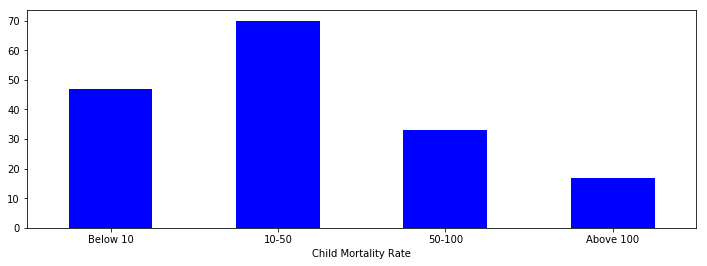

In [460]:
country_df2 = country_df.copy()
bins=[2,10,50,100,300]
slot=['Below 10','10-50','50-100','Above 100']
country_df2['child_mort_range']=pd.cut(country_df2['child_mort'],bins,labels=slot,include_lowest=True)
ax=country_df2['child_mort_range'].value_counts(sort=False).plot.bar(rot=0,color='b',figsize=(12,4))
plt.xlabel("Child Mortality Rate")
plt.show()

In [473]:
# Child Mortality range
ay=country_df2['child_mort_range'].value_counts(sort=False)
ay

Below 10     47
10-50        70
50-100       33
Above 100    17
Name: child_mort_range, dtype: int64

### Data Preprocessing

In [278]:
# converting % of GDP columns to per capita values
# exports per capita
country_df['exports'] = round(country_df['exports']*country_df['gdpp']/100,2)
# imports per capita
country_df['imports'] = round(country_df['imports']*country_df['gdpp']/100,2)

In [279]:
# health spent by government per capita
country_df['health'] = round(country_df['health']*country_df['gdpp']/100,2)

### Data Visualization

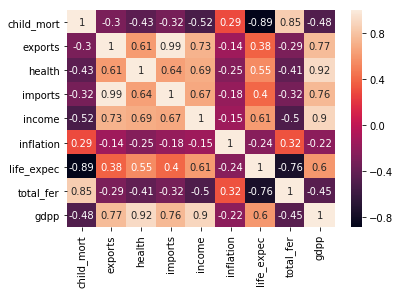

In [209]:
# correlation matrix
sns.heatmap(country_df.corr(), annot = True)

Many variables are highly correlated with each other. Thus PCA can be used to tackle multicollinearity and in the data and find optimal principan components

We can see that countries exports, imports and spent on health services are highly correlated to countries GDPP

Text(0.5, 0, 'gdpp')

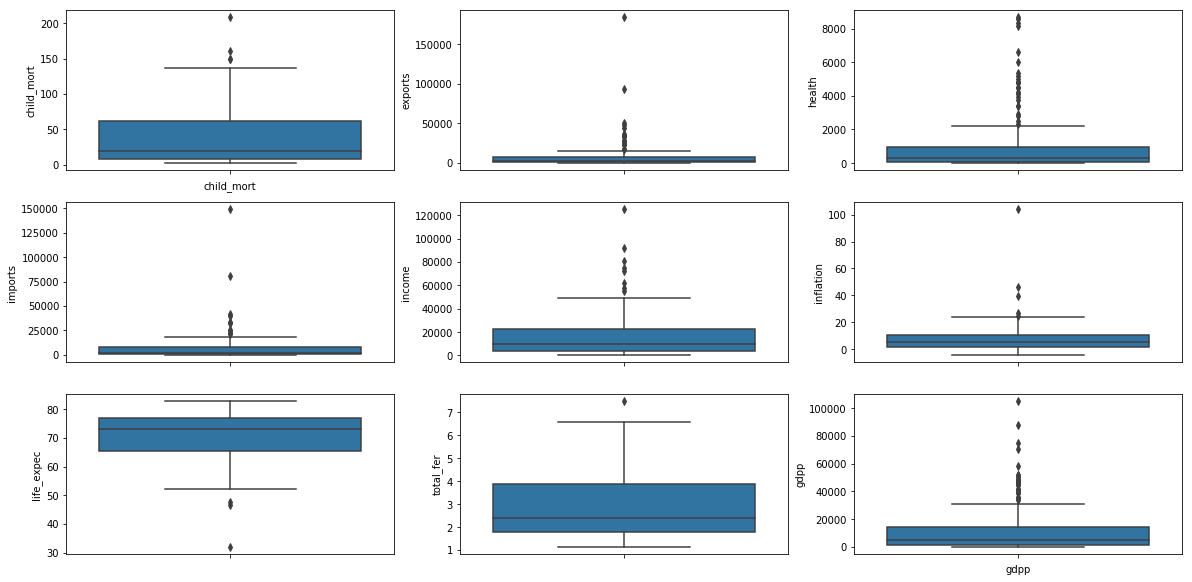

In [210]:
# Boxplots of numeric columns
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(data=country_df, x='child_mort', orient='v')
plt.xlabel("child_mort")

plt.subplot(3,3,2)
sns.boxplot(data=country_df, x='exports', orient='v')

plt.subplot(3,3,3)
sns.boxplot(data=country_df, x='health', orient='v')

plt.subplot(3,3,4)
sns.boxplot(data=country_df, x='imports', orient='v')

plt.subplot(3,3,5)
sns.boxplot(data=country_df, x='income', orient='v')

plt.subplot(3,3,6)
sns.boxplot(data=country_df, x='inflation', orient='v')

plt.subplot(3,3,7)
sns.boxplot(data=country_df, x='life_expec', orient='v')

plt.subplot(3,3,8)
sns.boxplot(data=country_df, x='total_fer', orient='v')

plt.subplot(3,3,9)
sns.boxplot(data=country_df, x='gdpp', orient='v')
plt.xlabel("gdpp")

In [481]:
# Countries having gdpp more than 40,000.
country_df[country_df['gdpp']>=40000.00]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700


In [212]:
# count of corntries with high GDPP
(country_df['gdpp']>40000).sum()

19

These 19 countries have high GDPP, low Child Mortality rate and high per capita income.

In [213]:
country_df[country_df['health']>4000]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400
29,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000
53,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200
54,France,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600
58,Germany,4.2,17681.4,4848.80,15507.8,40400,0.758,80.1,1.39,41800
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700
77,Japan,3.2,6675.0,4223.05,6052.0,35800,-1.900,82.8,1.39,44500


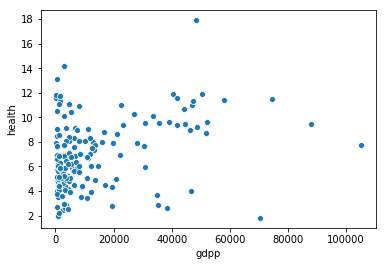

In [464]:
sns.scatterplot(x='gdpp' , y='health', data=country_df)

#### Countries with high spend on health per capita have low child mortality rate

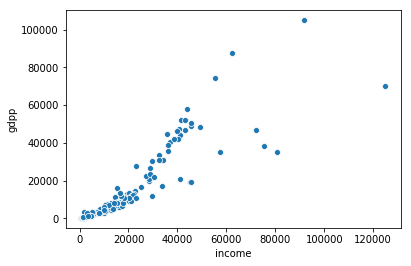

In [478]:
# relation between child_mort and per capita income
sns.scatterplot(x='income' , y='gdpp', data=country_df)

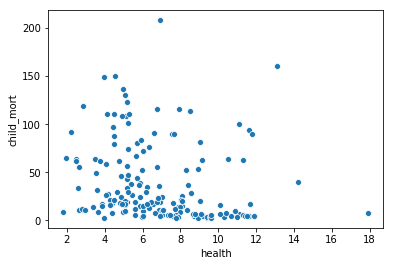

In [469]:
# GDPP Vs Income per capita
sns.scatterplot(y='child_mort' , x='health', data=country_df)

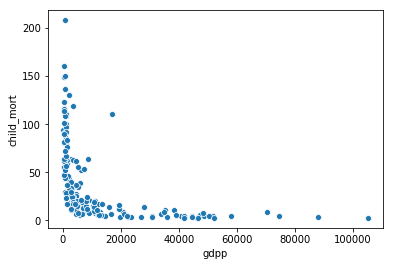

In [217]:
sns.scatterplot(x='gdpp' , y='child_mort', data=country_df)

We can see that the countries havinh High gdpp have high per capita income and also low child mortality rate. 
We can consider that these countries are not in the direst need of aid & may also influence our cluster formation.
- Thus removing countries with high gdpp (gdpp > 40000)

In [414]:
# Countries with high GDPP
(country_df['gdpp']>40000).sum()

19

### Outlier Treatment

In [280]:
# removing countries with gdpp > 40,000
# removing 19 countries
country_df2 = country_df[country_df['gdpp']<=40000]

In [281]:
# Dataframe after outlier treatment
country_df2.shape

(148, 10)

In [282]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [283]:
# Getting numeric columns in 'data'
data = country_df2.drop(['country'], axis=1)
country = list(country_df2.country)

In [284]:
country_df2.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [285]:
data.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

### Data Scaling

In [286]:
# Scaling numeric data
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data))
data_scaled.head()

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4,5,6,7,8
0,1.168674,-0.648257,-0.654165,-0.688763,-0.828040,0.080419,-1.524696,1.771137,-0.768254
1,-0.639507,-0.448865,-0.339655,-0.314712,-0.203537,-0.372963,0.828316,-0.943026,-0.379980
2,-0.376632,-0.345054,-0.453668,-0.441006,0.019392,0.690424,0.851729,-0.135937,-0.339363
3,1.876224,-0.256043,-0.572497,-0.416506,-0.506031,1.267456,-1.068141,1.992436,-0.441454
4,-0.794283,0.357155,0.311357,0.803087,0.484767,-0.652320,0.886848,-0.630605,0.510295


In [287]:
#Scaled data
data_scaled = pd.DataFrame(data_scaled)

In [288]:
data_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']
data_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.168674,-0.648257,-0.654165,-0.688763,-0.828040,0.080419,-1.524696,1.771137,-0.768254
1,-0.639507,-0.448865,-0.339655,-0.314712,-0.203537,-0.372963,0.828316,-0.943026,-0.379980
2,-0.376632,-0.345054,-0.453668,-0.441006,0.019392,0.690424,0.851729,-0.135937,-0.339363
3,1.876224,-0.256043,-0.572497,-0.416506,-0.506031,1.267456,-1.068141,1.992436,-0.441454
4,-0.794283,0.357155,0.311357,0.803087,0.484767,-0.652320,0.886848,-0.630605,0.510295


### Implementing PCA

In [289]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [290]:
pca.fit(data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [291]:
pca.components_

array([[-0.32194111,  0.35956203,  0.34958844,  0.36681298,  0.37172935,
        -0.10401854,  0.33538338, -0.31038295,  0.39049081],
       [ 0.47116475,  0.3524052 ,  0.12976212,  0.25170464,  0.24159334,
         0.34650788, -0.36464831,  0.44993756,  0.24448655],
       [-0.21542867, -0.04983714, -0.15147572, -0.1536196 ,  0.10969762,
         0.89976182,  0.25350008, -0.13118412, -0.03855384],
       [ 0.0768934 , -0.44618611,  0.7454214 , -0.28576408, -0.1679538 ,
         0.09695412,  0.10180344,  0.15190525,  0.29435263],
       [-0.07323099,  0.10521304,  0.14769237,  0.58635633, -0.64744279,
         0.13752786,  0.26894562,  0.21695211, -0.24585485],
       [ 0.15560074, -0.04055331,  0.19939456,  0.18961767, -0.22081529,
         0.1730089 , -0.54172915, -0.72405024, -0.04494546],
       [-0.76880754, -0.01841004,  0.06325872,  0.02419461, -0.02676153,
         0.03564273, -0.56028089,  0.29220544,  0.05218925],
       [ 0.02885998, -0.47572501, -0.44973006,  0.33665453, -0

In [292]:
# S matrix
pca.explained_variance_ratio_

array([0.61956374, 0.15732552, 0.10334608, 0.05096328, 0.02841048,
       0.02747304, 0.01024102, 0.00140005, 0.00127679])

In [293]:
features=list(data.columns)

In [294]:
# V matrix
pcs_df = pd.DataFrame({'Features':features,'PCA1':pca.components_[0], 'PCA2':pca.components_[1],'PCA3':pca.components_[2],'PCA4':pca.components_[3],
                      'PCA5':pca.components_[4],'PCA6':pca.components_[5],'PCA7':pca.components_[6],'PCA8':pca.components_[7],
                       'PCA9':pca.components_[8]})
pcs_df


,Features,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,child_mort,-0.321941,0.471165,-0.215429,0.076893,-0.073231,0.155601,-0.768808,0.028860,-0.023734
1,exports,0.359562,0.352405,-0.049837,-0.446186,0.105213,-0.040553,-0.018410,-0.475725,0.552804
2,health,0.349588,0.129762,-0.151476,0.745421,0.147692,0.199395,0.063259,-0.449730,-0.120506
3,imports,0.366813,0.251705,-0.153620,-0.285764,0.586356,0.189618,0.024195,0.336655,-0.450714
4,income,0.371729,0.241593,0.109698,-0.167954,-0.647443,-0.220815,-0.026762,-0.129745,-0.526988
5,inflation,-0.104019,0.346508,0.899762,0.096954,0.137528,0.173009,0.035643,0.004311,-0.002452
6,life_expec,0.335383,-0.364648,0.253500,0.101803,0.268946,-0.541729,-0.560281,0.004521,0.013640
7,total_fer,-0.310383,0.449938,-0.131184,0.151905,0.216952,-0.724050,0.292205,-0.006814,-0.064705
8,gdpp,0.390491,0.244487,-0.038554,0.294353,-0.245855,-0.044945,0.052189,0.663581,0.440551


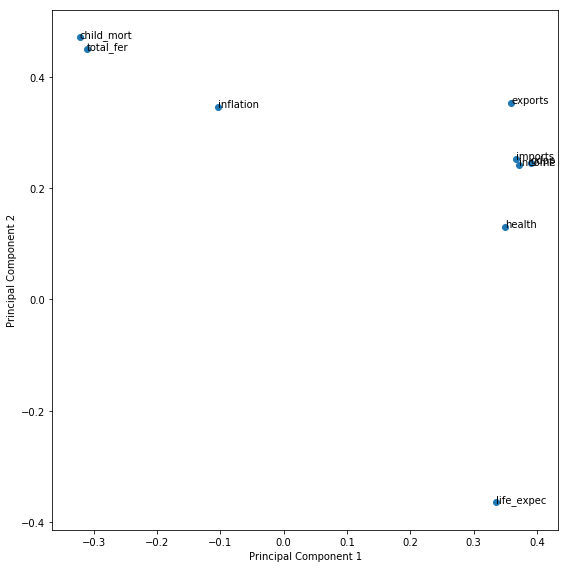

In [295]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PCA1, pcs_df.PCA2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Features):
    plt.annotate(txt, (pcs_df.PCA1[i],pcs_df.PCA2[i]))
plt.tight_layout()
plt.show()

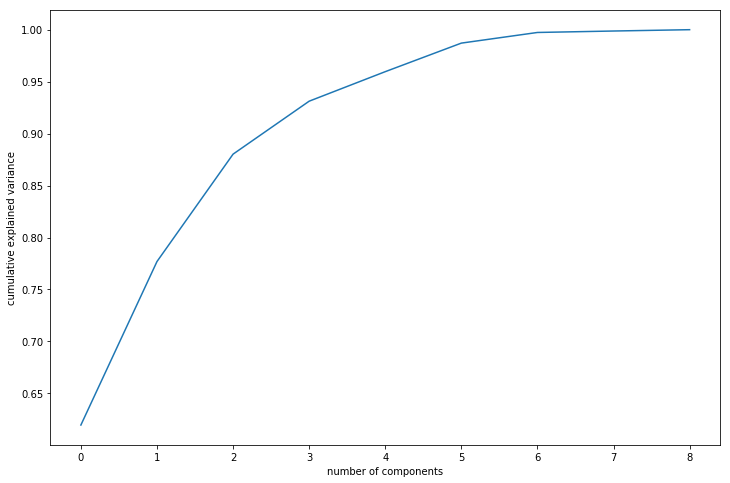

In [296]:
# Cumulative explauned variance by principal components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### From the scree plot, we can see that 5 Principal Components explain almost 95% of the variance

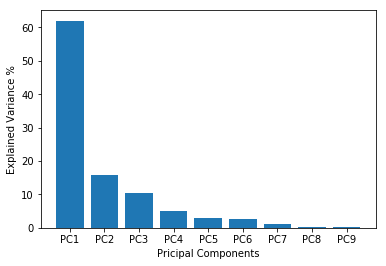

In [297]:
# bar-plot for explained variance by each Principal Component
per_var = np.round(pca.explained_variance_ratio_ * 100,1)
labels = ['PC'+str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label = labels)
plt.xlabel("Pricipal Components")
plt.ylabel("Explained Variance %")

plt.show()

###  Implementing PCA with 5 components

In [298]:
# Implementing PCA with 5 components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [299]:
final_pcs = pca_final.fit_transform(data)

In [302]:
final_pcs.shape

(148, 5)

In [303]:
final_pcs

array([[-1.39034042e+04,  3.72761702e+02, -1.45918373e+02,
         4.98267244e+02,  4.23259214e+00],
       [-4.93397363e+03, -1.56732398e+03, -2.40892312e+02,
        -8.35178759e+02, -1.67361451e+01],
       [-2.41634286e+03, -3.31125157e+03, -6.38549145e+02,
        -5.31244824e+02,  1.90336978e+01],
       [-8.13921335e+03,  5.97336551e+02, -3.39381475e+02,
         8.82825798e+02, -8.40171587e+01],
       [ 8.80644375e+03,  1.11137845e+03, -7.69580783e+01,
        -1.50545186e+03, -2.60416533e+02],
       [ 5.20691905e+03, -4.10296140e+03,  2.44688040e+03,
        -6.27540145e+02,  1.28737622e+02],
       [-8.14172385e+03, -5.48347814e+02,  1.41056944e+02,
        -3.58456763e+02, -1.18662150e+02],
       [ 1.07956717e+03, -4.16300427e+03, -9.09333737e+02,
         2.68273903e+02,  2.28219003e+02],
       [ 2.22870648e+04,  9.79972018e+03,  6.99060835e+03,
         1.01601909e+02, -5.09717590e+02],
       [ 3.35492597e+04, -3.08055261e+03, -3.81121049e+03,
        -1.70192630e+02

In [304]:
pc = np.transpose(final_pcs)

In [305]:
pc

array([[-1.39034042e+04, -4.93397363e+03, -2.41634286e+03,
        -8.13921335e+03,  8.80644375e+03,  5.20691905e+03,
        -8.14172385e+03,  1.07956717e+03,  2.22870648e+04,
         3.35492597e+04, -1.31563713e+04,  8.19674189e+03,
         1.91862568e+03, -5.86997448e+03, -1.35918060e+04,
        -8.79760887e+03, -9.90996268e+03, -4.67047357e+03,
        -3.94870995e+02,  2.13117017e+03,  7.41994527e+04,
         1.68056170e+03, -1.40329253e+04, -1.47690972e+04,
        -1.29213073e+04, -1.26094207e+04, -8.51366924e+03,
        -1.45476901e+04, -1.33665593e+04,  8.48912074e+03,
        -5.20489195e+03, -3.31383221e+03, -1.38926149e+04,
        -1.47847642e+04, -9.05846375e+03,  2.31266930e+02,
        -1.24965150e+04,  9.65219952e+03,  3.51279793e+04,
         2.32536447e+04, -3.34225854e+03, -5.14973503e+03,
        -6.22485154e+03, -7.76869359e+03,  2.59526929e+04,
        -1.41279474e+04,  1.50667334e+04, -6.79468124e+03,
         2.76022637e+03, -1.38391805e+04, -8.11507382e+0

In [306]:
final_df = pd.DataFrame({'PC1':pc[0], 'PC2':pc[1],'PC3':pc[2], 'PC4':pc[3],'PC5':pc[4]})

In [307]:
final_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-13903.404245,372.761702,-145.918373,498.267244,4.232592
1,-4933.973633,-1567.323979,-240.892312,-835.178759,-16.736145
2,-2416.342865,-3311.251570,-638.549145,-531.244824,19.033698
3,-8139.213350,597.336551,-339.381475,882.825798,-84.017159
4,8806.443755,1111.378450,-76.958078,-1505.451857,-260.416533


In [308]:
# creating copy of final_df
final_df_h = final_df.copy()

In [309]:
# Hopkins Statistics - Checking the cluster tendency
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [310]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(final_df)

0.8354438468878217

#### Hopkins score is 90%. Which shows data is highly clusterable.

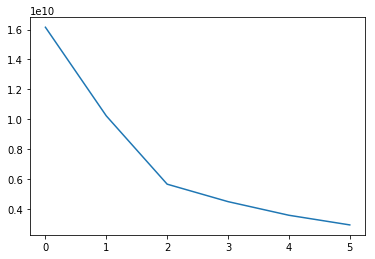

In [311]:
# Finding optimal number of clustres
# Elbow-curve
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ssd=[]
range_n_clusters = [2,3,4,5,6,7]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(final_df)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

##### K- means shows 4 as optimal number of clusters 

In [312]:
# Silhouette Analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(final_pcs)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(final_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.6995963461568606
For n_clusters=3, the silhouette score is 0.567165771024134
For n_clusters=4, the silhouette score is 0.5876484170493537
For n_clusters=5, the silhouette score is 0.5144491510492655
For n_clusters=6, the silhouette score is 0.49873285655350613
For n_clusters=7, the silhouette score is 0.5121865643111907
For n_clusters=8, the silhouette score is 0.51612992081797


#### Based on Elbow curve and silhouette score we will test clusters for k = 3 and k=4

### First Implementing: Model with " k = 3 "

In [313]:
# model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50, random_state = 50)
kmeans.fit(final_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [314]:
# Cluster labels
kmeans.labels_

array([0, 0, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 0, 0, 0,
       2, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 2,
       0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 2, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 1, 0, 0, 0])

In [315]:
final_df['cluster_id_k3'] = kmeans.labels_
final_df.head()

,PC1,PC2,PC3,PC4,PC5,cluster_id_k3
0,-13903.404245,372.761702,-145.918373,498.267244,4.232592,0
1,-4933.973633,-1567.323979,-240.892312,-835.178759,-16.736145,0
2,-2416.342865,-3311.251570,-638.549145,-531.244824,19.033698,1
3,-8139.213350,597.336551,-339.381475,882.825798,-84.017159,0
4,8806.443755,1111.378450,-76.958078,-1505.451857,-260.416533,1


In [316]:
# Number of countries in each cluster for k = 3
final_df.cluster_id_k3.value_counts()

0    88
1    40
2    20
Name: cluster_id_k3, dtype: int64

Text(0.5, 0, 'Scatter plot with k =3')

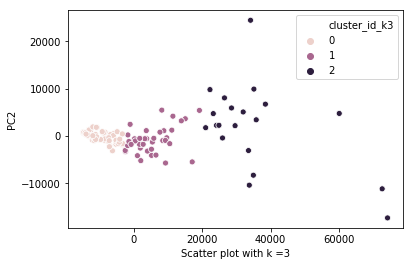

In [317]:
# Scatter plot with K = 3
sns.scatterplot(x='PC1', y='PC2', hue='cluster_id_k3',legend='full',data=final_df)
plt.xlabel("Scatter plot with k =3")

### Model with " k = 4 "

In [318]:
# Building model with k=4
kmeans = KMeans(n_clusters=4, max_iter=50, random_state = 50)
kmeans.fit(final_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [319]:
kmeans.labels_

array([1, 1, 2, 1, 2, 2, 1, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 3, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1,
       0, 1, 2, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 0, 0,
       1, 1, 2, 1, 1, 3, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 2, 0, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 3, 0, 2, 1, 1, 2, 1, 1, 1])

In [320]:
final_df['cluster_id_k4'] = kmeans.labels_
final_df.head()

,PC1,PC2,PC3,PC4,PC5,cluster_id_k3,cluster_id_k4
0,-13903.404245,372.761702,-145.918373,498.267244,4.232592,0,1
1,-4933.973633,-1567.323979,-240.892312,-835.178759,-16.736145,0,1
2,-2416.342865,-3311.251570,-638.549145,-531.244824,19.033698,1,2
3,-8139.213350,597.336551,-339.381475,882.825798,-84.017159,0,1
4,8806.443755,1111.378450,-76.958078,-1505.451857,-260.416533,1,2


In [321]:
# Count of countries in each cluster for k=4
final_df.cluster_id_k4.value_counts()

1    88
2    39
0    18
3     3
Name: cluster_id_k4, dtype: int64

Text(0.5, 0, 'Scatter plot with k =4')

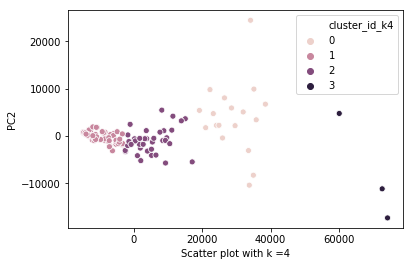

In [322]:
# Scatter plot with K = 4
sns.scatterplot(x='PC1', y='PC2', hue='cluster_id_k4',legend='full',data=final_df)
plt.xlabel("Scatter plot with k =4")

#### From the above plot with k=3 and k=4, algorithm is giving almost similar clusters (for k = 4 it is grouping highly developed countries in one cluster)
#### In both the Models (k=3 & k=4) count of under developed countries is same.
#### Thus prefering k=3 over k=4

In [325]:
final_df=final_df.drop(['cluster_id_k4'], axis=1)

In [327]:
# adding 'country' column
final_df['country'] = country
final_df.head()

In [331]:
# merging original dataset with 'final_df'
final_dft = pd.merge(final_df,country_df2,on='country',how='left')

In [332]:
final_dft.head()

,PC1,PC2,PC3,PC4,PC5,cluster_id_k3,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-13903.404245,372.761702,-145.918373,498.267244,4.232592,0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553
1,-4933.973633,-1567.323979,-240.892312,-835.178759,-16.736145,0,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090
2,-2416.342865,-3311.251570,-638.549145,-531.244824,19.033698,1,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460
3,-8139.213350,597.336551,-339.381475,882.825798,-84.017159,0,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530
4,8806.443755,1111.378450,-76.958078,-1505.451857,-260.416533,1,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200


In [334]:
# all the countries having high child mortality rate (above 120) are in one cluster
final_dft[final_dft['child_mort']>120]

,PC1,PC2,PC3,PC4,PC5,cluster_id_k3,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
27,-14547.690073,663.470163,-48.203015,701.661840,-14.974493,0,Central African Republic,149.0,52.63,17.75,118.19,888,2.01,47.5,5.21,446
28,-13366.559322,506.107648,-149.936372,599.328379,-15.546036,0,Chad,150.0,330.10,40.63,390.20,1930,6.39,56.5,6.59,897
58,-13878.230715,607.272174,-130.956861,453.753422,-16.575346,0,Haiti,208.0,101.29,45.74,428.31,1500,5.45,32.1,3.33,662
85,-13591.857772,319.664763,-138.686232,552.996969,-5.115077,0,Mali,137.0,161.42,35.26,248.51,1870,4.37,59.5,6.55,708
99,-14635.864839,709.557914,-137.811452,679.617618,-6.770320,0,Niger,123.0,77.26,17.96,170.87,814,2.55,58.8,7.49,348
100,-10059.926397,-688.221894,170.426699,418.289280,-7.819107,0,Nigeria,130.0,589.49,118.13,405.42,5150,104.00,60.5,5.84,2330
117,-14305.297467,473.486922,-154.877810,625.828662,31.697497,0,Sierra Leone,160.0,67.03,52.27,137.66,1220,17.20,55.0,5.20,399


In [336]:
# all the countries with low income are in one cluster (i.e. cluster 0)
final_dft[final_dft['income']<12000]

,PC1,PC2,PC3,PC4,PC5,cluster_id_k3,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-13903.404245,372.761702,-145.918373,498.267244,4.232592,0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.440,56.2,5.82,553
1,-4933.973633,-1567.323979,-240.892312,-835.178759,-16.736145,0,Albania,16.6,1145.20,267.90,1987.74,9930,4.490,76.3,1.65,4090
3,-8139.213350,597.336551,-339.381475,882.825798,-84.017159,0,Angola,119.0,2199.19,100.60,1514.37,5900,22.400,60.1,6.16,3530
6,-8141.723853,-548.347814,141.056944,-358.456763,-118.662150,0,Armenia,18.1,669.76,141.68,1458.66,6700,7.770,73.3,1.69,3220
10,-13156.371329,-56.145133,-158.331852,481.247463,-3.350977,0,Bangladesh,49.4,121.28,26.68,165.24,2440,7.140,70.4,2.33,758
13,-5869.974476,506.272356,-605.791910,223.190525,-49.473038,0,Belize,18.8,2525.88,225.68,2495.50,7880,1.140,71.4,2.71,4340
14,-13591.805999,395.127177,-114.725287,562.047922,-16.639875,0,Benin,111.0,180.40,31.08,281.98,1820,0.885,61.8,5.36,758
15,-8797.608873,-652.060989,-743.578120,-364.232311,-18.495442,0,Bhutan,42.7,926.50,113.36,1541.26,6420,5.990,72.1,2.38,2180
16,-9909.962676,-725.897987,-353.634752,283.623619,16.544044,0,Bolivia,46.6,815.76,95.83,679.14,5410,8.780,71.6,3.20,1980
17,-4670.473573,-912.900453,-41.458995,-817.552308,152.426774,0,Bosnia and Herzegovina,6.9,1369.17,511.71,2364.93,9720,1.400,76.8,1.31,4610


### Calculating Cluster Means for k=3

In [337]:
mean_child_mort = pd.DataFrame(final_dft.groupby(["cluster_id_k3"]).child_mort.mean())
mean_income = pd.DataFrame(final_dft.groupby(["cluster_id_k3"]).income.mean())
mean_gdpp = pd.DataFrame(final_dft.groupby(["cluster_id_k3"]).gdpp.mean())

In [338]:
df_means = pd.concat([mean_child_mort,mean_income,mean_gdpp], axis=1)

In [339]:
df_means

,child_mort,income,gdpp
cluster_id_k3,,,
0,61.153409,4622.306818,2114.590909
1,17.110000,17252.500000,9550.750000
2,12.170000,38705.000000,27475.000000


###### Cluster 0 has lowest income and gdpp, & highest child mortality rate.

### Hierarchial Clustering

In [340]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [341]:
final_df_h.head()

,PC1,PC2,PC3,PC4,PC5
0,-13903.404245,372.761702,-145.918373,498.267244,4.232592
1,-4933.973633,-1567.323979,-240.892312,-835.178759,-16.736145
2,-2416.342865,-3311.251570,-638.549145,-531.244824,19.033698
3,-8139.213350,597.336551,-339.381475,882.825798,-84.017159
4,8806.443755,1111.378450,-76.958078,-1505.451857,-260.416533


### Single Linkage

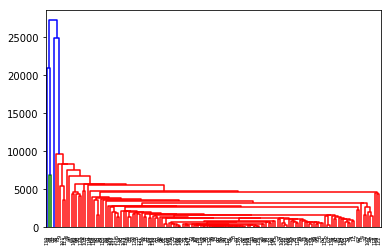

In [342]:
# single linkage
mergings = linkage(final_df_h, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Dendogram formed by single linkage is highly unredable.

### Complete Linkage

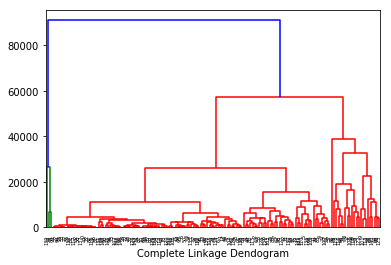

In [344]:
# complete linkage
mergings_c = linkage(final_df_h, method="complete", metric='euclidean')
dendrogram(mergings_c)
plt.xlabel("Complete Linkage Dendogram")
plt.show()

In [412]:
# Above dendogram shows 3 distinct clusters
cluster_labels_c = cut_tree(mergings_c, n_clusters=3).reshape(-1, )
cluster_labels_c

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0])

In [347]:
# cluster id for complete linkage
final_dft['Hie_comp_clusterID'] = cluster_labels_c

### Average Linkage

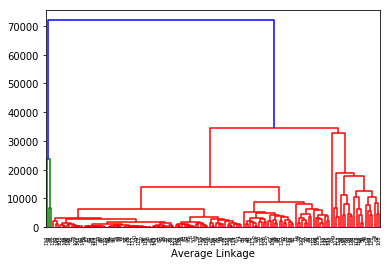

In [349]:
# average linkage
mergings_avg = linkage(final_df_h, method="average", metric='euclidean')
dendrogram(mergings_avg)
plt.xlabel("Average Linkage")
plt.show()

In [350]:
# 3 clusters
cluster_labels_a = cut_tree(mergings_avg, n_clusters=3).reshape(-1, )
cluster_labels_a

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0])

In [351]:
# Cluster Id for average linkage 
final_dft['Hie_avg_clusterID'] = cluster_labels_a

#### Final dataframe containing cluster_ID's from "k = 3", "hierarchial complete" and "hierarchial average" linkage

In [352]:
# Final dataframe containing cluster_ID's from k-means, hierarchial complete and hierarchial average linkage
final_dft.head()

,PC1,PC2,PC3,PC4,PC5,cluster_id_k3,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Hie_comp_clusterID,Hie_avg_clusterID
0,-13903.404245,372.761702,-145.918373,498.267244,4.232592,0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553,0,0
1,-4933.973633,-1567.323979,-240.892312,-835.178759,-16.736145,0,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090,0,0
2,-2416.342865,-3311.251570,-638.549145,-531.244824,19.033698,1,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460,0,0
3,-8139.213350,597.336551,-339.381475,882.825798,-84.017159,0,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530,0,0
4,8806.443755,1111.378450,-76.958078,-1505.451857,-260.416533,1,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200,0,0


### Calculating means of child_mort, income, gdpp for
- K-Means
- Hierarchial Complete Linkage
- Hierarchial Average Linkage

In [353]:
# Mean of child_mort, income, gdpp from k-means
df_means

,child_mort,income,gdpp
cluster_id_k3,,,
0,61.153409,4622.306818,2114.590909
1,17.110000,17252.500000,9550.750000
2,12.170000,38705.000000,27475.000000


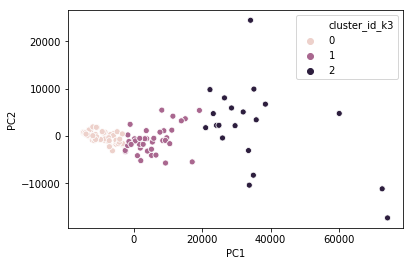

In [416]:
# Clusters Formed by K-Means
sns.scatterplot(x='PC1', y='PC2', hue='cluster_id_k3',legend='full',data=final_dft)

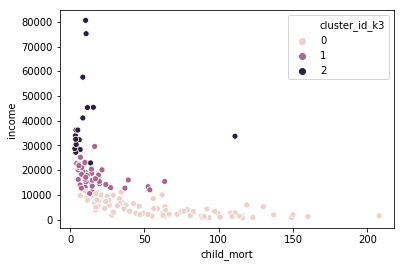

In [419]:
# Cluster 2 
sns.scatterplot(x='child_mort', y='income', hue='cluster_id_k3',legend='full',data=final_dft)

In [355]:
# Mean of child_mort, income, gdpp from Hierarchial Complete Linkage
hie_com_child = final_dft.groupby(['Hie_comp_clusterID']).child_mort.mean()
hie_com_gdpp = final_dft.groupby(['Hie_comp_clusterID']).gdpp.mean()
hie_com_income = final_dft.groupby(['Hie_comp_clusterID']).income.mean()
hie_com_mean = pd.concat([hie_com_child,hie_com_gdpp,hie_com_income], axis=1)
hie_com_mean

,child_mort,gdpp,income
Hie_comp_clusterID,,,
0,48.921951,4072.471545,7940.349593
1,11.909091,23086.363636,30950.000000
2,9.966667,36266.666667,71133.333333


Text(0.5, 0, 'Scatter Plot: Complete Linkage')

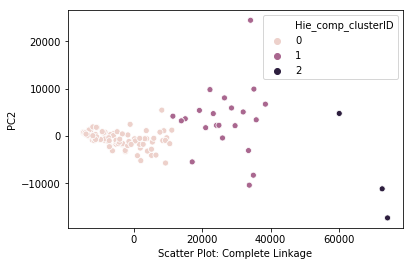

In [411]:
# Clusters formed by Complete Linkage
sns.scatterplot(x='PC1', y='PC2', hue='Hie_comp_clusterID',legend='full',data=final_dft)
plt.xlabel("Scatter Plot: Complete Linkage")

In [357]:
# Mean of child_mort, income, gdpp from Average Linkage
hie_avg_child = final_dft.groupby(['Hie_avg_clusterID']).child_mort.mean()
hie_avg_gdpp = final_dft.groupby(['Hie_avg_clusterID']).gdpp.mean()
hie_avg_income = final_dft.groupby(['Hie_avg_clusterID']).income.mean()
hie_avg_mean = pd.concat([hie_avg_child,hie_avg_gdpp,hie_avg_income], axis=1)
hie_avg_mean

,child_mort,gdpp,income
Hie_avg_clusterID,,,
0,48.921951,4072.471545,7940.349593
1,11.909091,23086.363636,30950.000000
2,9.966667,36266.666667,71133.333333


Text(0.5, 0, 'Clusters: Hierarchial Clustering - Average Linkage')

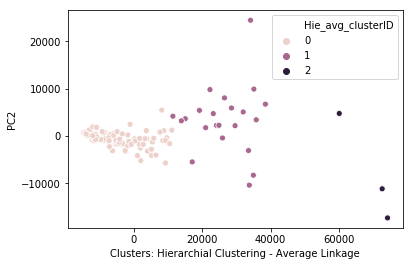

In [358]:
# Cluster formation through Average Linkage
sns.scatterplot(x='PC1', y='PC2', hue='Hie_avg_clusterID',legend='full',data=final_dft)
plt.xlabel("Clusters: Hierarchial Clustering - Average Linkage")

#### Average Linkage and Complete Linkage have formed almost same clusters 
#### Clusters formed by Complete Likage are more distinct as compared to K-means Clustering
#### Thus using Complete Linkage to find countries in the direst need of aid.

Text(0.5, 0, 'GDPP')

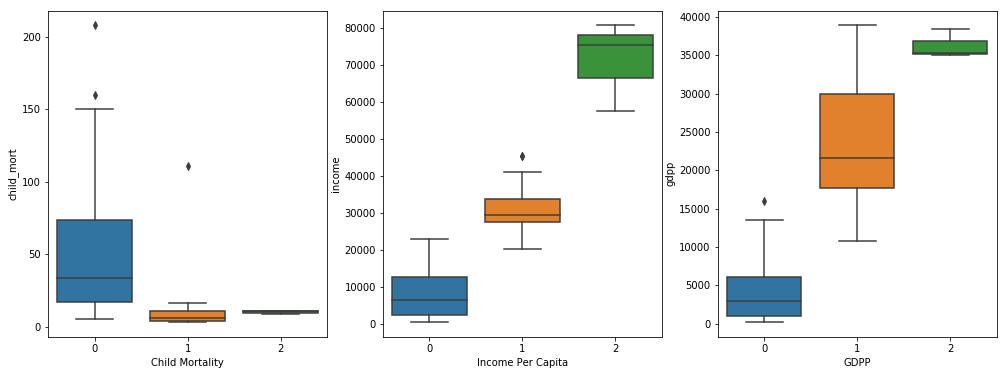

In [370]:
plt.figure(figsize = (17,6))
plt.subplot(1,3,1)
sns.boxplot(x='Hie_comp_clusterID', y = 'child_mort', data= final_dft)
plt.xlabel("Child Mortality")
plt.subplot(1,3,2)
sns.boxplot(x='Hie_comp_clusterID', y = 'income', data= final_dft)
plt.xlabel("Income Per Capita")
plt.subplot(1,3,3)
sns.boxplot(x='Hie_comp_clusterID', y = 'gdpp', data= final_dft)
plt.xlabel("GDPP")

### We have clustered the countries in three different categories: 
                               - Developed Coluntries (Cluster 2)
                               - Developing Countries (Cluster 1)
                               - Under Developed Countries (Cluster 0)

#### From the above boxplots we can see that cluster 0 shows countries with:
                               - High Child Mortality Rate
                               - Lowest Per Capita Income
                               - And Lowest GDPP

# Finding the countries in the direst need of aid

In [ ]:
# Getting under-developed countries on one dataframe
Under_Developed = final_dft[final_dft['Hie_comp_clusterID'] == 0 ]

In [485]:
# 123 countries come under Under-Developed countries category
(final_dft['Hie_comp_clusterID'] == 0 ).sum()

123

In [396]:
# means of clusters based on child_mort, income and gdpp
hie_com_mean

,child_mort,gdpp,income
Hie_comp_clusterID,,,
0,48.921951,4072.471545,7940.349593
1,11.909091,23086.363636,30950.000000
2,9.966667,36266.666667,71133.333333


In [409]:
#Using Concept of binning to fing countries in direst need of aid
# As we have to fing top conutries in need of aid we will decide the threshold based on data understanding
low_income = Under_Developed[Under_Developed['income']<6000]
low_gdpp = low_income[low_income['gdpp']<3000]
direst_need_countries = low_gdpp[low_gdpp['child_mort']>100]

### Top 15 Countries in Direst Need of Aid

In [410]:
direst_need_countries[["country",'child_mort','income','gdpp']]

,country,child_mort,income,gdpp
14,Benin,111.0,1820,758
22,Burkina Faso,116.0,1430,575
25,Cameroon,108.0,2660,1310
27,Central African Republic,149.0,888,446
28,Chad,150.0,1930,897
33,"Congo, Dem. Rep.",116.0,609,334
36,Cote d'Ivoire,111.0,2690,1220
55,Guinea,109.0,1190,648
56,Guinea-Bissau,114.0,1390,547
58,Haiti,208.0,1500,662
